In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from sklearn.decomposition import PCA
from pca import pca
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from xgboost import XGBRegressor


In [37]:
test_scores = pd.read_csv("datasets/Admission and Test Scores/ADM_2015-2021_data.csv")
test_scores.head()

,unitid,admcon1,admcon2,admcon3,admcon4,admcon5,admcon6,admcon7,admcon8,admcon9,...,actcm25,actcm75,acten25,acten75,actmt25,actmt75,satwr25,satwr75,actwr25,year
0,100654,Required,Recommended,Required,Recommended,Neither required nor recommended,Recommended,Considered but not required,Required,Neither required nor recommended,...,15.0,20.0,14.0,20.0,15.0,NaN,NaN,NaN,NaN,2021
1,100663,Required,Neither required nor recommended,Required,Required,Neither required nor recommended,Neither required nor recommended,Considered but not required,Neither required nor recommended,Neither required nor recommended,...,23.0,30.0,23.0,33.0,21.0,NaN,NaN,NaN,NaN,2021
2,100706,Required,Recommended,Required,Neither required nor recommended,Neither required nor recommended,Recommended,Required,Required,Neither required nor recommended,...,24.0,31.0,24.0,32.0,23.0,NaN,NaN,NaN,NaN,2021
3,100724,Required,Neither required nor recommended,Recommended,Neither required nor recommended,Neither required nor recommended,Neither required nor recommended,Considered but not required,Required,Neither required nor recommended,...,15.0,20.0,12.0,22.0,15.0,NaN,NaN,NaN,NaN,2021
4,100751,Required,Recommended,Required,Required,Neither required nor recommended,Neither required nor recommended,Considered but not required,Required,Neither required nor recommended,...,21.0,31.0,21.0,33.0,19.0,NaN,NaN,NaN,NaN,2021


In [38]:
test_scores_copy = test_scores.copy()

In [39]:
test_scores_copy['ftm_ratio'] = test_scores_copy['enrlftm']/test_scores_copy['enrlft']
test_scores_copy['ftw_ratio'] = test_scores_copy['enrlftw']/test_scores_copy['enrlft']

In [40]:
annual_avg = test_scores_copy.groupby('year').mean()

/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/3058517097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_avg = test_scores_copy.groupby('year').mean()


In [45]:
public_fin = pd.read_csv("datasets/Institutional Finances/F_F1A_1415-1920_data.csv", low_memory=False)
public_fin = public_fin.groupby('unitid').mean().reset_index()
print(len(public_fin))
public_fin.head()

2010


/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/3257254532.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  public_fin = public_fin.groupby('unitid').mean().reset_index()


,unitid,f1a01,f1a31,f1a04,f1a05,f1a06,f1a07,f1a08,f1a09,f1a10,...,f1h03b,f1h03c,f1h03d,f1n01,f1n02,f1n03,f1n04,f1n05,f1n06,year
0,100654,9.555195e+07,1.295820e+08,1.432761e+07,1.439096e+08,2.394616e+08,3.318814e+06,6.950189e+07,7.282070e+07,7.450086e+07,...,NaN,NaN,NaN,-17695164.0,1.820774e+08,19179411.0,-1.620711e+07,-7.882460e+07,84095687.0,1667.5
1,100663,1.594129e+09,1.635314e+09,1.429002e+09,3.064317e+09,4.658445e+09,3.595785e+07,4.813575e+08,5.173153e+08,9.623222e+08,...,-24394912.0,0.0,0.0,150898087.0,4.268321e+09,170508208.0,4.074294e+09,1.144734e+09,63098687.0,1667.5
2,100706,1.232633e+08,2.690003e+08,8.740337e+07,3.564037e+08,4.796670e+08,5.041705e+06,7.085105e+07,7.589276e+07,1.171604e+08,...,-2014207.0,1817344.0,-1816662.0,8333743.0,2.817352e+08,9970150.0,3.459439e+08,1.560548e+08,152896569.0,1667.5
3,100724,5.584644e+07,2.774644e+08,3.701944e+06,2.811663e+08,3.370128e+08,8.445083e+06,3.134017e+07,3.978525e+07,2.055497e+08,...,8305028.0,895886.0,7420313.0,16308737.0,1.522240e+08,16308737.0,9.457469e+07,0.000000e+00,203995814.0,1667.5
4,100733,3.777462e+06,1.259619e+07,1.138410e+07,2.398028e+07,2.775775e+07,0.000000e+00,3.576652e+06,3.576652e+06,0.000000e+00,...,NaN,NaN,NaN,89742.0,2.157520e+07,89742.0,4.506809e+06,7.545148e+06,0.0,1667.5


38619151.02892422


(array([1.0518e+04, 5.9600e+02, 2.1800e+02, 1.5700e+02, 1.2400e+02,
        6.5000e+01, 3.8000e+01, 1.5000e+01, 2.7000e+01, 2.4000e+01,
        1.1000e+01, 1.0000e+01, 8.0000e+00, 5.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 7.75290500e+07, 1.55058100e+08, 2.32587150e+08,
        3.10116200e+08, 3.87645250e+08, 4.65174300e+08, 5.42703350e+08,
        6.20232400e+08, 6.97761450e+08, 7.75290500e+08, 8.52819550e+08,
        9.30348600e+08, 1.00787765e+09, 1.08540670e+09, 1.16293575e+09,
        1.24046480e+09, 1.31799385e+09, 1.39552290e+09, 1.47305195e+09,
        1.55058100e+09]),
 <BarContainer object of 20 artists>)

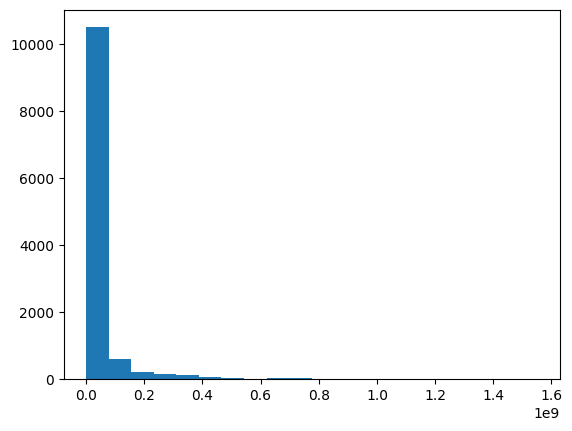

In [7]:
print(public_fin['f1b01'].mean())
plt.hist(public_fin['f1b01'], bins=20)

In [78]:
pnp_fin = pd.read_csv("datasets/Institutional Finances/F_F2_1415-1920_data.csv", low_memory=False)
pnp_fin = pnp_fin.groupby('unitid').mean().reset_index()
print(len(pnp_fin))
pnp_fin.head()

2068


/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/295207239.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pnp_fin = pnp_fin.groupby('unitid').mean().reset_index()


,unitid,f2a01,f2a02,f2a03,f2a03a,f2a04,f2a05,f2a05a,f2a05b,f2a06,...,f2h03b,f2h03c,f2h03d,f2i01,f2i02,f2i03,f2i04,f2i05,f2i06,year
0,100690,8.760923e+06,1.307510e+07,2.535914e+06,1.508292e+06,9.889659e+06,6.495275e+05,1.748072e+05,4.747203e+05,1.053919e+07,...,13.0,0.0,0.0,2394351.0,9381760.0,2201197.0,11951175.0,14152372.0,0.0,1667.5
1,100937,5.235002e+07,1.722822e+08,5.624674e+07,3.738436e+07,5.059348e+07,6.544197e+07,4.314847e+07,2.229350e+07,1.160355e+08,...,1006739.0,5444864.0,-10889728.0,-6024836.0,39799160.0,-7539920.0,111529044.0,-4126246.0,31790881.0,1667.5
2,101073,1.404627e+06,1.362275e+07,4.539956e+06,0.000000e+00,6.643169e+06,2.439628e+06,1.393872e+06,1.045756e+06,9.082797e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1516.0
3,101189,2.053785e+07,9.023248e+07,4.341386e+07,3.305182e+07,2.887515e+07,1.794347e+07,1.271332e+07,5.230149e+06,4.681862e+07,...,333357.0,-1126002.0,0.0,-957785.0,42667202.0,-1371279.0,47914957.0,11573210.0,32760907.0,1667.5
4,101365,0.000000e+00,8.337251e+06,3.799330e+06,0.000000e+00,4.537922e+06,0.000000e+00,0.000000e+00,0.000000e+00,4.537922e+06,...,NaN,NaN,NaN,3106728.0,8852352.0,3106728.0,5717594.0,0.0,0.0,1768.5


In [47]:
pfp_fin = pd.read_csv("datasets/Institutional Finances/F_F3_1415-1920_data.csv", low_memory=False)
pfp_fin = pfp_fin.groupby('unitid').mean().reset_index()
print(len(pfp_fin))
pfp_fin.head()

3375


/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/3593404382.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pfp_fin = pfp_fin.groupby('unitid').mean().reset_index()


,unitid,f3a01,f3a01a,f3a01b,f3a01c,f3a02,f3a02a,f3a03,f3a04,f3a05,...,f3c17,f3c171,f3c172,f3g01,f3g02,f3g03,f3g04,f3g05,f3g06,year
0,101116,4.925224e+06,0.0,1.495777e+06,22306.0,2.586224e+06,0.000000,2.339000e+06,4.925224e+06,0.0,...,0.0,0.0,0.0,-116216.0,6308243.0,1999615.0,2379172.0,646580.0,0.0,1667.5
1,101277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1667.5
2,101365,6.995714e+06,0.0,2.416994e+06,9577.0,2.093880e+06,0.000000,4.901834e+06,6.995714e+06,752129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1465.5
3,101958,4.911928e+06,0.0,7.385000e+02,0.0,2.234425e+05,0.000000,4.688486e+06,4.911928e+06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1465.5
4,102845,4.584560e+07,0.0,3.767555e+06,4515148.0,6.433169e+06,2630.333333,3.941243e+07,4.584560e+07,0.0,...,6772187.0,6772187.0,0.0,-167953.0,46512931.0,38988459.0,43746141.0,34000445.0,0.0,1667.5


In [48]:
finaid = pd.read_csv('datasets/Student Financial Aid/SFA_1415-2021_data.csv')
finaid = finaid.groupby('unitid').mean().reset_index()
print(len(finaid))
finaid.head()

7506


,unitid,scugrad,scugffn,scugffp,scfa2,scfa1n,scfa1p,scfa11n,scfa11p,scfa12n,...,npt411,npt421,npt431,npt441,npt451,npt410,npt420,npt430,npt440,year
0,100654,4873.428571,1426.285714,29.285714,4873.428571,1426.285714,29.285714,0.142857,0.0,818.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.0
1,100663,12891.857143,2019.857143,15.714286,12891.857143,2019.857143,15.714286,0.000000,0.0,1700.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.0
2,100690,316.000000,4.000000,1.285714,316.000000,4.000000,1.285714,NaN,NaN,NaN,...,12874.0,11133.5,NaN,NaN,NaN,8610.2,11053.5,NaN,NaN,1718.0
3,100706,6987.571429,1218.571429,17.428571,6987.571429,1218.571429,17.428571,0.000000,0.0,908.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.0
4,100724,4253.000000,1017.285714,24.142857,4253.000000,1017.285714,24.142857,0.000000,0.0,534.857143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.0


In [13]:
money_and_scores = pd.merge(finaid, test_scores_copy, on='unitid', how='outer')

In [14]:
money_and_scores['avg_award'] = (money_and_scores['gista0'] + money_and_scores['gista1'] + money_and_scores['gista2'])/3
money_and_scores['comp_sat75'] = money_and_scores['satmt75'] + money_and_scores['satvr75']
money_and_scores['comp_sat25'] = money_and_scores['satmt25'] + money_and_scores['satvr25']
money_and_scores = money_and_scores.dropna(axis='index', subset=['comp_sat75', 'comp_sat25'])
len(money_and_scores)

56576

Text(0, 0.5, 'ACT composite, 2015-2021')

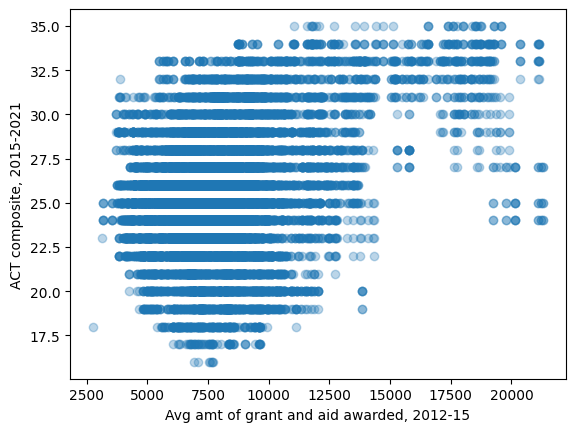

In [15]:
plt.scatter(money_and_scores['avg_award'], money_and_scores['actcm75'], alpha=0.3)
plt.xlabel('Avg amt of grant and aid awarded, 2012-15')
plt.ylabel('ACT composite, 2015-2021')

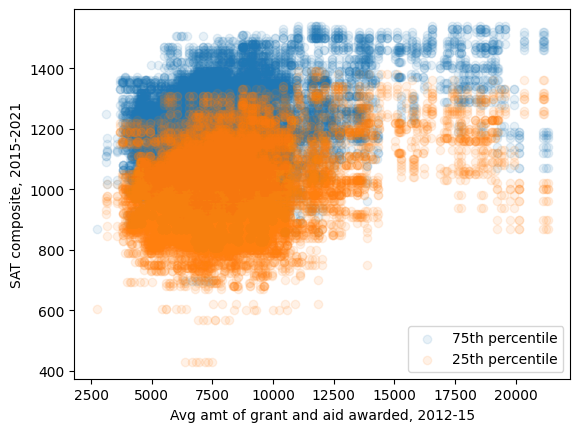

In [16]:
plt.scatter(money_and_scores['avg_award'], money_and_scores['comp_sat75'], alpha=0.1, label='75th percentile')
plt.scatter(money_and_scores['avg_award'], money_and_scores['comp_sat25'], alpha=0.1, label='25th percentile')
plt.xlabel('Avg amt of grant and aid awarded, 2012-15')
plt.ylabel('SAT composite, 2015-2021')
plt.legend()

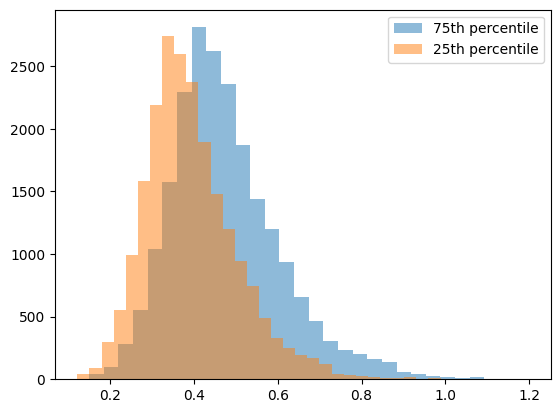

In [17]:
plt.hist(3*money_and_scores['comp_sat75']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='75th percentile')
plt.hist(3*money_and_scores['comp_sat25']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='25th percentile')
plt.legend()

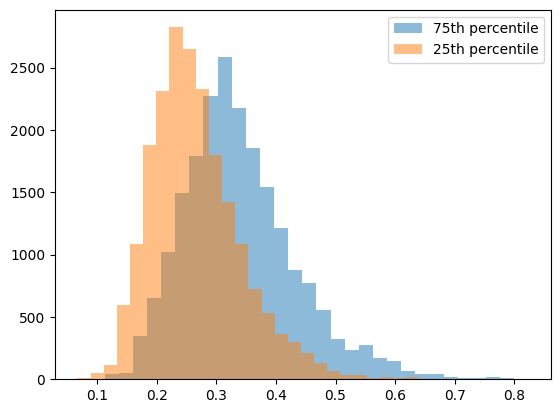

In [18]:
plt.hist(100*money_and_scores['actcm75']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='75th percentile')
plt.hist(100*money_and_scores['actcm25']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='25th percentile')
plt.legend()

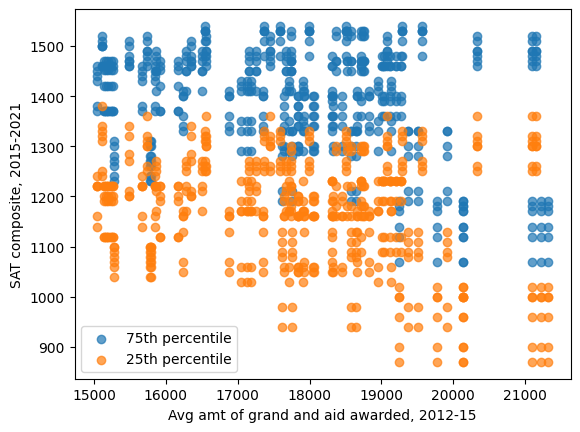

In [19]:
high_awarders = money_and_scores[money_and_scores['avg_award'] >= 15000]
plt.scatter(high_awarders['avg_award'], high_awarders['comp_sat75'], alpha=0.7, label='75th percentile')
plt.scatter(high_awarders['avg_award'], high_awarders['comp_sat25'], alpha=0.7, label='25th percentile')
plt.xlabel('Avg amt of grand and aid awarded, 2012-15')
plt.ylabel('SAT composite, 2015-2021')
plt.legend()

In [49]:
twelve_mo = pd.read_csv('datasets/12-Month Enrollment/EFFY_2015-2021_data.csv', low_memory=False)
twelve_mo = twelve_mo.groupby('unitid').mean().reset_index()
print(len(twelve_mo))
twelve_mo.head()

7880


/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/3085548102.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twelve_mo = twelve_mo.groupby('unitid').mean().reset_index()


,unitid,efytotlt,efytotlm,efytotlw,efyaiant,efyaianm,efyaianw,efyasiat,efyasiam,efyasiaw,...,efy2mort,efy2morm,efy2morw,efyunknt,efyunknm,efyunknw,efynralt,efynralm,efynralw,year
0,100654,2663.600000,1077.166667,1586.433333,6.233333,2.183333,4.050000,6.233333,3.083333,3.150000,...,31.966667,11.050000,20.916667,119.683333,41.800000,77.883333,27.850000,14.333333,13.516667,2019.616667
1,100663,8820.885246,3372.852459,5448.032787,21.409836,7.229508,14.180328,512.245902,218.344262,293.901639,...,337.409836,123.245902,214.163934,97.032787,43.049180,53.983607,337.983607,197.950820,140.032787,2019.639344
2,100690,366.132075,137.433962,228.698113,1.245283,0.622642,0.622642,2.000000,0.962264,1.037736,...,0.000000,0.000000,0.000000,37.132075,15.301887,21.830189,0.000000,0.000000,0.000000,2019.509434
3,100706,4254.688525,2404.327869,1850.360656,44.262295,23.901639,20.360656,157.229508,86.803279,70.426230,...,129.262295,65.885246,63.377049,174.737705,90.442623,84.295082,157.688525,106.327869,51.360656,2019.639344
4,100724,2156.627119,804.694915,1351.932203,3.508475,1.271186,2.237288,8.711864,4.288136,4.423729,...,25.440678,9.593220,15.847458,25.508475,10.101695,15.406780,32.898305,18.084746,14.813559,2019.610169


In [54]:
pub_dps = pd.merge(public_fin, twelve_mo, on='unitid', how='left')
pub_dps = pd.merge(pub_dps, finaid, on='unitid', how='left')
pub_dps['instruction_per_student'] = pub_dps['f1c011']/pub_dps['efytotlt']
pub_dps['research_per_student'] = pub_dps['f1c021']/pub_dps['efytotlt']
pub_dps['support_per_student'] = pub_dps['f1c051']/pub_dps['efytotlt']
pub_dps['services_per_student'] = pub_dps['f1c061']/pub_dps['efytotlt']
len(pub_dps)

2010

In [55]:
pub_dps['avg_net_price_2012-15'] = (pub_dps['npist0'] + pub_dps['npist1'] + pub_dps['npist2'])/3

In [23]:
# fig, ax = plt.subplots(2, 2)
# ax[0,0].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['instruction_per_student'], alpha=0.1)
# ax[0,0].set_xlabel('Average net price 2012-2015')
# ax[0,0].set_ylabel('Instruction ($) per student')

# ax[0,1].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['research_per_student'], alpha=0.1)
# ax[0,1].set_xlabel('Average net price 2012-2015')
# ax[0,1].set_ylabel('Research ($) per student')

# ax[1,0].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['support_per_student'], alpha=0.1)
# ax[1,0].set_xlabel('Average net price 2012-2015')
# ax[1,0].set_ylabel('Support ($) per student')

# ax[1,1].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['services_per_student'], alpha=0.1)
# ax[1,1].set_xlabel('Average net price 2012-2015')
# ax[1,1].set_ylabel('Services ($) per student')

# plt.tight_layout()

In [246]:
pnp_dps = pd.merge(pnp_fin, twelve_mo, on='unitid', how='left')
pnp_dps = pd.merge(pnp_dps, finaid, on='unitid', how='left')
pnp_dps['instruction_per_student'] = pnp_dps['f2e011']/pnp_dps['efytotlt']
pnp_dps['research_per_student'] = pnp_dps['f2e021']/pnp_dps['efytotlt']
pnp_dps['support_per_student'] = pnp_dps['f2e041']/pnp_dps['efytotlt']
pnp_dps['services_per_student'] = pnp_dps['f2e051']/pnp_dps['efytotlt']

pnp_dps['avg_net_price_2012-15'] = (pnp_dps['npist0'] + pnp_dps['npist1'] + pnp_dps['npist2'])/3

len(pnp_dps)

2068

In [85]:
def plot3D(px,py,pz,clist,emphPoints = [],cmap='plasma',title='',shadow=False, useCMAP = True,xLabel='',yLabel='',zLabel='',savefig='',saveN = 1, setRange = 0):
    
    elev = 30
    azim = 60

    viewVect = [np.cos(np.pi*180/elev)*np.sin(np.pi*180/azim),np.cos(np.pi*180/elev)*np.cos(np.pi*180/azim),np.cos(np.pi*180/elev)]
    
    thetalist = np.linspace(0,2*np.pi,saveN + 1)
    thetalist = thetalist[:-1]
    
    projMat = np.array([px,py])

    s = ''
    
    for idx in range(saveN):
        theta = thetalist[idx]
        rotMat = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
        
        rotx,roty = np.dot(rotMat,projMat)
        rotz = pz
        clistRot = clist
        
        p = np.array([rotx,roty,rotz])
        dots = np.array(np.dot(viewVect,p))
        sort = dots.argsort()

        fig, ax = plt.subplots(figsize = (10,10))
        
        ax.set_alpha(0)
        ax.axis('off')

        ax = fig.add_subplot(projection='3d')

        ax.patch.set_alpha(0)

        Xdist = px.max() - px.min()
        Xcntr = (px.max() + px.min())/2.0
        Ydist = py.max() - py.min()
        Ycntr = (py.max() + py.min())/2.0
        Zdist = pz.max() - pz.min()
        Zcntr = (pz.max() + pz.min())/2.0

        if setRange == 0:
            dist = 0.55*max(Xdist,Ydist,Zdist)
        else:
            dist = 0.55*setRange

        for p in emphPoints:
            ax.scatter([rotx[p]],[roty[p]],[rotz[p]],c='C1',s=200)
            if shadow:
                ax.scatter([rotx[p]],[roty[p]],[Zcntr - dist],c='black',alpha=0.5)
                ax.scatter([rotx[p]],[Ycntr + dist],[rotz[p]],c='black',alpha=0.5)
                ax.scatter([Xcntr - dist],[roty[p]],[rotz[p]],c='black',alpha=0.5)
        
        rotx = rotx[sort]
        roty = roty[sort]
        rotz = rotz[sort]
        clistRot = np.array(clistRot)[sort]
        
        if useCMAP:
            s = ax.scatter(rotx,roty,rotz,c=clistRot,s = 3, linewidth=0.2,cmap = cmap)
        else:
            s = ax.scatter(rotx,roty,rotz,c=clistRot,s = 3, linewidth=0.2)


        ax.set_xlim([Xcntr - dist, Xcntr + dist])
        ax.set_ylim([Ycntr - dist, Ycntr + dist])
        ax.set_zlim([Zcntr - dist, Zcntr + dist])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_axis_off()
        #plt.show()

        if shadow:
            #fig = plt.figure(figsize = (10,10))
            #ax = fig.gca(projection='3d')
            ax.view_init(30,-60)

            ax.scatter(rotx,roty,[Zcntr - dist for p in rotz],c='black',s=3, alpha=0.01)
            ax.scatter(rotx,[Ycntr + dist for p in roty],rotz,c='black',s=3,alpha=0.01)
            ax.scatter([Xcntr - dist for p in rotx],roty,rotz,c='black',s=3,alpha=0.01)

            ax.set_xlim([Xcntr - dist, Xcntr + dist])
            ax.set_ylim([Ycntr - dist, Ycntr + dist])
            ax.set_zlim([Zcntr - dist, Zcntr + dist])

            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])

            #ax.set_axis_off()
        ax.set_xlabel(xLabel,fontsize=16)
        ax.set_ylabel(yLabel,fontsize=16)
        ax.set_zlabel(zLabel,fontsize=16)
        
        
        if title == '':
            pass
        else:
            plt.title(title,fontsize=30)

        if savefig == '':
            cb = plt.colorbar(s)
            plt.show()
        else:
            cb = plt.colorbar(s)
            plt.savefig(savefig+str(idx)+'.png')
            plt.close()
        
        fig.tight_layout()
  
def trianglePlot(arry,clist,emphPoints = [],dim=2):  
  ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
  axesDist = 0.6*max(ranges)
  
  figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
  for row in range(dim-1,-1,-1):
      for col in range(dim-1,-1,-1):
          if col >= row:
              py = arry[:,row]
              px = arry[:,col+1]
              
              centerX = (px.max()+px.min())/2
              centerY = (py.max()+py.min())/2
              
              sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
              for p in emphPoints:
                  axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
              
              axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
              axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
              if row != col:
                  axs[row,col].set_xticks([])
                  axs[row,col].set_yticks([])
              if row == col:
                  axs[row,col].set_ylabel('direction '+str(row+1))
                  axs[row,col].set_xlabel('direction '+str(col+2))
                  
              axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
          else:
              axs[row,col].axis('off')
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()
    

In [145]:
clusters = 7
X = pnp_dps[['instruction_per_student', 'research_per_student', 'support_per_student', 'services_per_student']]
X = X.dropna()
X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
scaler = StandardScaler().fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

pca = PCA(n_components=4, random_state=9)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2', 'PC3', 'PC4'])

X = X_pca.values

spending_gmm = GaussianMixture(n_components=clusters)
y_cluster_gmm = spending_gmm.fit_predict(X)
y_cluster_gmm

array([3, 1, 3, ..., 2, 1, 0])

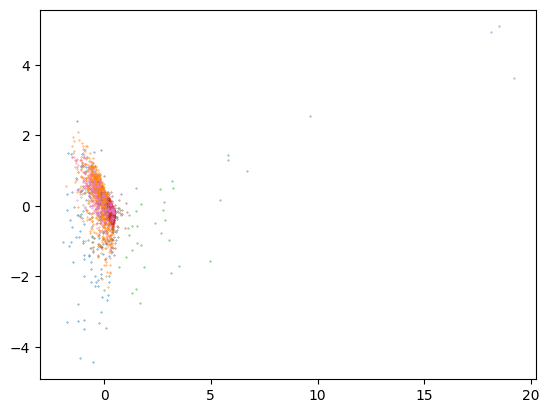

In [149]:
for cluster in np.unique(y_cluster_gmm):
    # get row indexes for samples with this cluster
    row_ix = np.where(y_cluster_gmm == cluster)
    plt.scatter(X[row_ix, 1], X[row_ix, 2], s = 0.1)

plt.show()

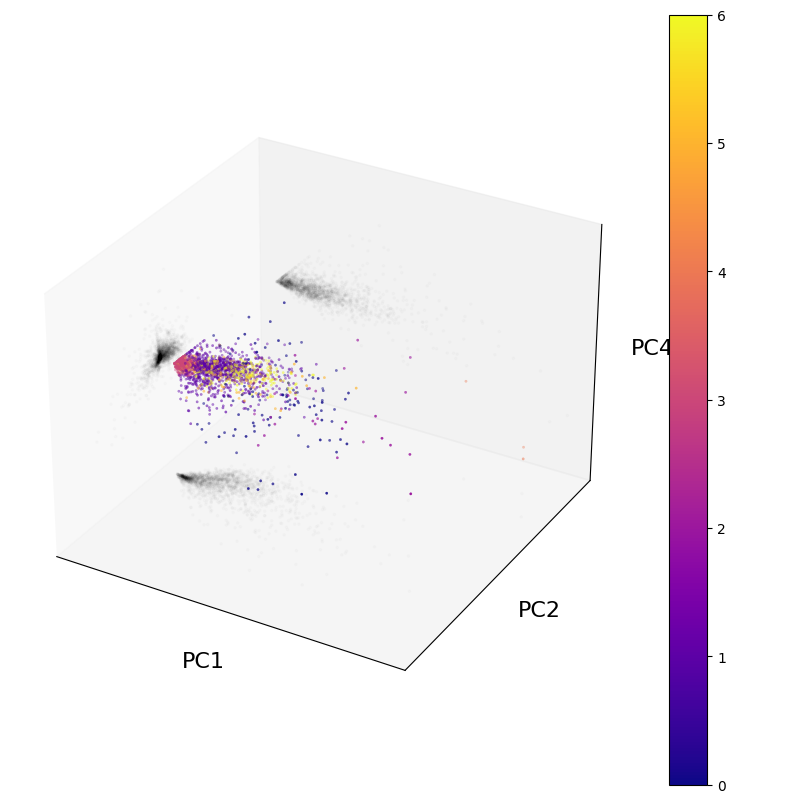

In [151]:
color = y_cluster_gmm

plot3D(X[:,0], X[:,2], X[:,3], color, shadow=True, xLabel = 'PC1', yLabel = 'PC2', zLabel = 'PC4')

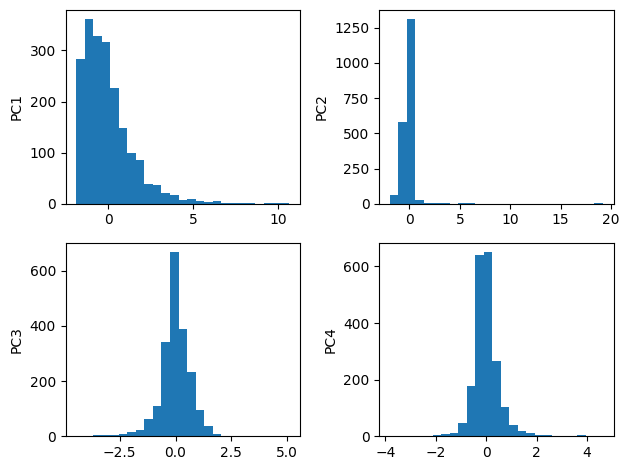

In [156]:
fig, ax = plt.subplots(2, 2)
ax[0,0].hist(X_pca['PC1'], bins = 25)
ax[0,0].set_ylabel('PC1')
ax[0,1].hist(X_pca['PC2'], bins = 25)
ax[0,1].set_ylabel('PC2')
ax[1,0].hist(X_pca['PC3'], bins = 25)
ax[1,0].set_ylabel('PC3')
ax[1,1].hist(X_pca['PC4'], bins = 25)
ax[1,1].set_ylabel('PC4')

fig.tight_layout()

In [25]:
# fig, ax = plt.subplots(2, 2)
# ax[0,0].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['instruction_per_student'], alpha=0.1)
# ax[0,0].set_xlabel('Average net price 2012-2015')
# ax[0,0].set_ylabel('Instruction ($) per student')

# ax[0,1].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['research_per_student'], alpha=0.1)
# ax[0,1].set_xlabel('Average net price 2012-2015')
# ax[0,1].set_ylabel('Research ($) per student')

# ax[1,0].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['support_per_student'], alpha=0.1)
# ax[1,0].set_xlabel('Average net price 2012-2015')
# ax[1,0].set_ylabel('Support ($) per student')

# ax[1,1].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['services_per_student'], alpha=0.1)
# ax[1,1].set_xlabel('Average net price 2012-2015')
# ax[1,1].set_ylabel('Services ($) per student')

# plt.tight_layout()

In [271]:
finaid = pd.read_csv('datasets/Student Financial Aid/SFA_1415-2021_data.csv')
finaid = finaid.groupby('unitid').mean().reset_index()
fed_assist = finaid[['unitid', 'uagrntt', 'uagrnta', 'upgrntt', 'upgrnta', 'ufloant', 'ufloana', 'agrnt_t', 'agrnt_a', 'npist0', 'npist1', 'npist2']]
fed_assist = fed_assist.dropna()
fed_assist['pell/loans_total'] = fed_assist['upgrntt']/fed_assist['ufloant']
fed_assist['pell/loans_average'] = fed_assist['upgrnta']/fed_assist['ufloana']
fed_assist['avg_net_price_12-15'] = (fed_assist['npist0'] + fed_assist['npist0'] + fed_assist['npist0'])/3
fed_assist

,unitid,uagrntt,uagrnta,upgrntt,upgrnta,ufloant,ufloana,agrnt_t,agrnt_a,npist0,npist1,npist2,pell/loans_total,pell/loans_average,avg_net_price_12-15
0,100654,3.979543e+07,9421.285714,1.735037e+07,5033.142857,2.749449e+07,7581.714286,1.180797e+07,9441.571429,14393.571429,14748.714286,14488.000000,0.631049,0.663853,14393.571429
1,100663,6.972894e+07,8304.857143,2.252380e+07,4994.428571,4.600713e+07,7243.714286,1.712199e+07,9477.714286,15758.714286,16220.571429,16650.285714,0.489572,0.689484,15758.714286
3,100706,4.235716e+07,8837.714286,8.084301e+06,4334.714286,1.927970e+07,6789.857143,1.208038e+07,10943.714286,14246.571429,14786.857143,15362.857143,0.419317,0.638410,14246.571429
4,100724,3.232794e+07,8284.571429,1.440571e+07,4549.428571,3.153627e+07,9402.000000,7.806731e+06,8731.285714,12016.714286,12398.857143,12680.285714,0.456798,0.483879,12016.714286
5,100751,2.713054e+08,13944.428571,2.604532e+07,4445.000000,8.111538e+07,6584.857143,7.306926e+07,15447.142857,19815.857143,19925.857143,20258.428571,0.321090,0.675034,19815.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,488730,3.866024e+06,2615.833333,2.446596e+06,4197.500000,5.777497e+05,4636.000000,7.073850e+05,2674.833333,9186.500000,8711.800000,8367.166667,4.234698,0.905414,9186.500000
7128,489201,1.027138e+07,2215.833333,5.214895e+06,3971.600000,1.042622e+05,3357.000000,2.183325e+06,4020.666667,5195.500000,4930.800000,5208.333333,50.017136,1.183080,5195.500000
7166,490212,1.524260e+05,5971.200000,9.860260e+04,4198.200000,2.149924e+05,6952.800000,1.784025e+04,3983.750000,18077.000000,32690.000000,33594.500000,0.458633,0.603814,18077.000000
7208,490805,2.925284e+07,5712.600000,1.233972e+07,4003.000000,2.200478e+07,6483.200000,5.275704e+06,7358.400000,10133.600000,10046.000000,9676.000000,0.560775,0.617442,10133.600000


In [62]:
price_labels = pub_dps[['unitid', 'avg_net_price_2012-15']]
price_labels = price_labels.drop_duplicates()
len(price_labels)

2010

In [63]:
fed_assist = pd.merge(price_labels, fed_assist, on='unitid', how='left')

X = fed_assist[['uagrntt', 'uagrnta', 'upgrntt', 'upgrnta', 'ufloant', 'ufloana', 'agrnt_t', 'agrnt_a', 'pell/loans_total', 'pell/loans_average']]
y = fed_assist['avg_net_price_2012-15']

# print(len(fed_assist))

offset = int(X.shape[0] * 0.85)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

NameError: name 'LazyRegressor' is not defined

In [197]:
rankings = pd.read_excel('rankings.xlsx')
rankings.columns = rankings.iloc[0]
rankings = rankings[1:]
rankings = rankings.rename(columns={"IPEDS ID": "unitid"})
rankings = rankings.fillna(150)
rankings

,University Name,unitid,State,2023.0,2022.0,2021.0,2020.0,2019.0,2018.0,2017.0,...,1995.0,1994.0,1993.0,1992.0,1991.0,1990.0,1989.0,1988.0,1986.0,1984.0
1,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
2,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,150.0,10.0
3,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
4,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0
5,Stanford University,243744,CA,3.0,6.0,6.0,6.0,7.0,5.0,5.0,...,5.0,6.0,4.0,3.0,2.0,6.0,6.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,University of Cincinnati,201885,OH,150.0,148.0,150.0,150.0,150.0,150.0,150.0,...,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0
164,University of Mississippi,176017,MS,150.0,148.0,150.0,150.0,150.0,150.0,150.0,...,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0
165,Ohio University,204857,OH,150.0,150.0,150.0,150.0,150.0,150.0,150.0,...,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0
166,University of Arkansas,106397,AR,150.0,150.0,150.0,153.0,147.0,133.0,135.0,...,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0


In [198]:
pnp_endowments = pd.read_csv("datasets/Institutional Finances/F_F2_1415-1920_data.csv", low_memory=False)
pnp_endowments['end_year'] = [float('20' + str(i)[2:]) for i in pnp_endowments['year']]
pnp_endowments

,unitid,f2a01,f2a02,f2a03,f2a03a,f2a04,f2a05,f2a05a,f2a05b,f2a06,...,f2h03c,f2h03d,f2i01,f2i02,f2i03,f2i04,f2i05,f2i06,year,end_year
0,100690,8.543662e+06,1.200829e+07,3.194663e+06,1.809724e+06,8.214781e+06,5.988480e+05,1.748050e+05,424043.0,8.813629e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,2015.0
1,100937,6.130582e+07,1.905859e+08,7.171504e+07,4.299803e+07,4.438267e+07,7.448816e+07,6.208192e+07,12406245.0,1.188708e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,2015.0
2,101073,2.083800e+06,1.508764e+07,3.222053e+06,0.000000e+00,9.373483e+06,2.492106e+06,1.673126e+06,818980.0,1.186559e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,2015.0
3,101189,2.046218e+07,9.037064e+07,4.282644e+07,3.206238e+07,3.077431e+07,1.676989e+07,1.163823e+07,5131659.0,4.754420e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,2015.0
4,101435,4.831935e+07,8.463314e+07,2.667780e+07,2.306348e+07,7.279432e+06,5.067591e+07,4.828619e+07,2389726.0,5.795534e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,495280,7.725700e+04,2.024860e+06,1.228340e+05,9.407800e+04,1.699223e+06,2.028030e+05,0.000000e+00,202803.0,1.902026e+06,...,NaN,NaN,129147.0,1.130680e+06,228793.0,1.673233e+06,1.902026e+06,9.407800e+04,1920,2020.0
11194,495314,0.000000e+00,2.988150e+06,1.590117e+07,0.000000e+00,-1.291302e+07,0.000000e+00,0.000000e+00,0.0,-1.291302e+07,...,0.0,0.0,-18765672.0,1.166282e+07,-18765672.0,5.904168e+06,0.000000e+00,0.000000e+00,1920,2020.0
11195,495767,6.570770e+09,1.713559e+10,7.703068e+09,2.337306e+09,6.629454e+09,2.803071e+09,1.932855e+09,870216000.0,9.432525e+09,...,-126397000.0,40530000.0,-924020000.0,6.631981e+09,-733478000.0,1.016600e+10,5.833461e+09,2.337306e+09,1920,2020.0
11196,495916,0.000000e+00,2.890460e+05,1.864020e+05,0.000000e+00,1.026440e+05,0.000000e+00,0.000000e+00,0.0,1.026440e+05,...,NaN,NaN,1437517.0,2.266049e+06,1437517.0,-1.334873e+06,2.890460e+05,0.000000e+00,1920,2020.0


In [199]:
rankings = pd.merge(rankings, pnp_endowments[pnp_endowments['end_year'] == 2015][['f2a02', 'unitid']], on='unitid', how='left')
rankings = rankings.rename(columns={"f2a02": "assets_2015"})
rankings = pd.merge(rankings, pnp_endowments[pnp_endowments['end_year'] == 2016][['f2a02', 'unitid']], on='unitid', how='left')
rankings = rankings.rename(columns={"f2a02": "assets_2016"})
rankings = pd.merge(rankings, pnp_endowments[pnp_endowments['end_year'] == 2017][['f2a02', 'unitid']], on='unitid', how='left')
rankings = rankings.rename(columns={"f2a02": "assets_2017"})
rankings = pd.merge(rankings, pnp_endowments[pnp_endowments['end_year'] == 2018][['f2a02', 'unitid']], on='unitid', how='left')
rankings = rankings.rename(columns={"f2a02": "assets_2018"})
rankings = pd.merge(rankings, pnp_endowments[pnp_endowments['end_year'] == 2019][['f2a02', 'unitid']], on='unitid', how='left')
rankings = rankings.rename(columns={"f2a02": "assets_2019"})
rankings = pd.merge(rankings, pnp_endowments[pnp_endowments['end_year'] == 2020][['f2a02', 'unitid']], on='unitid', how='left')
rankings = rankings.rename(columns={"f2a02": "assets_2020"})
rankings

,University Name,unitid,State,2023.0,2022.0,2021.0,2020.0,2019.0,2018.0,2017.0,...,1989.0,1988.0,1986.0,1984.0,assets_2015,assets_2016,assets_2017,assets_2018,assets_2019,assets_2020
0,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,4.0,4.0,4.0,2.789141e+10,2.738040e+10,2.942900e+10,3.158205e+10,3.207419e+10,3.303022e+10
1,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,...,5.0,11.0,150.0,10.0,2.190286e+10,2.229438e+10,2.392921e+10,2.607304e+10,2.775082e+10,3.050553e+10
2,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,2.0,2.0,7.520651e+10,7.690435e+10,5.372006e+10,5.674828e+10,5.932715e+10,6.146244e+10
3,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,...,1.0,3.0,2.0,3.0,3.698632e+10,3.695725e+10,3.919452e+10,4.187298e+10,4.442812e+10,4.469638e+10
4,Stanford University,243744,CA,3.0,6.0,6.0,6.0,7.0,5.0,5.0,...,6.0,1.0,1.0,1.0,3.621388e+10,3.776741e+10,4.195422e+10,4.403679e+10,4.637011e+10,4.993361e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,University of Cincinnati,201885,OH,150.0,148.0,150.0,150.0,150.0,150.0,150.0,...,150.0,150.0,150.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN
163,University of Mississippi,176017,MS,150.0,148.0,150.0,150.0,150.0,150.0,150.0,...,150.0,150.0,150.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN
164,Ohio University,204857,OH,150.0,150.0,150.0,150.0,150.0,150.0,150.0,...,150.0,150.0,150.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN
165,University of Arkansas,106397,AR,150.0,150.0,150.0,153.0,147.0,133.0,135.0,...,150.0,150.0,150.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN


                            OLS Regression Results                            
Dep. Variable:                 assets   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     698.1
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           5.44e-93
Time:                        11:40:23   Log-Likelihood:                -502.47
No. Observations:                 444   AIC:                             1009.
Df Residuals:                     442   BIC:                             1017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0961      0.061    378.063      0.0

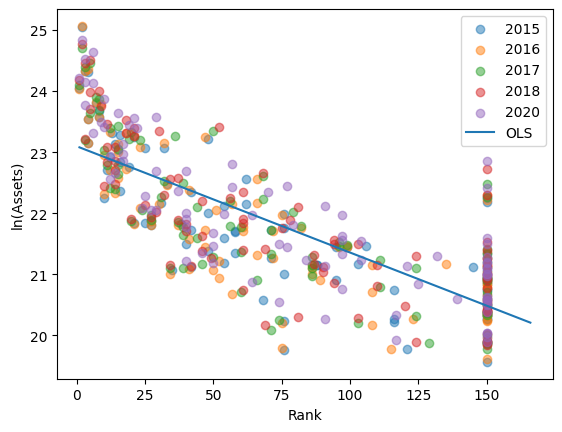

In [233]:
log_assets = []
log_assets_per_student = []
rank = []
for i in [2015, 2016, 2017, 2018, 2020]:
    y = rankings['assets_' + str(i)]
    x = rankings[i]
    plt.scatter(x, np.log(y), alpha=0.5, label=str(i))
    log_assets.extend(np.log(y))
    # log_assets_per_student.extend()
    rank.extend(x)
plt.ylabel('ln(Assets)')
plt.xlabel('Rank')

rank_asset = list(zip(rank, log_assets))
rank_asset_df = pd.DataFrame(rank_asset, columns=['rank', 'assets'])
rank_asset_df = rank_asset_df.dropna()

X = sm.add_constant(rank_asset_df['rank'])
y = rank_asset_df['assets']

mod = sm.OLS(y, X).fit()

domain = np.linspace(min(rank), max(rank), 1000)

plt.plot(domain, mod.params.const + mod.params[1]*domain, label='OLS')

print(mod.summary())

plt.legend()

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [587] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [80] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [587] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[80]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
     PC   feature   loading  type
0   PC1    f2e052  0.075599  best
1   PC2   gis4g40  0.090987  best
2   PC3    grn4g2 -0.097934  best
3   PC4   grn4of0  0.117308  best
4   PC5   gis4a40  0.173526  best
5   PC6    scfy1n  0.117976  best
6   PC7  efynhpim  0.158361  best
7   PC8    npt421  0.213378  best
8   PC9    f2e095 -0.117071  best
9  PC10    f2e095  0.224493  best


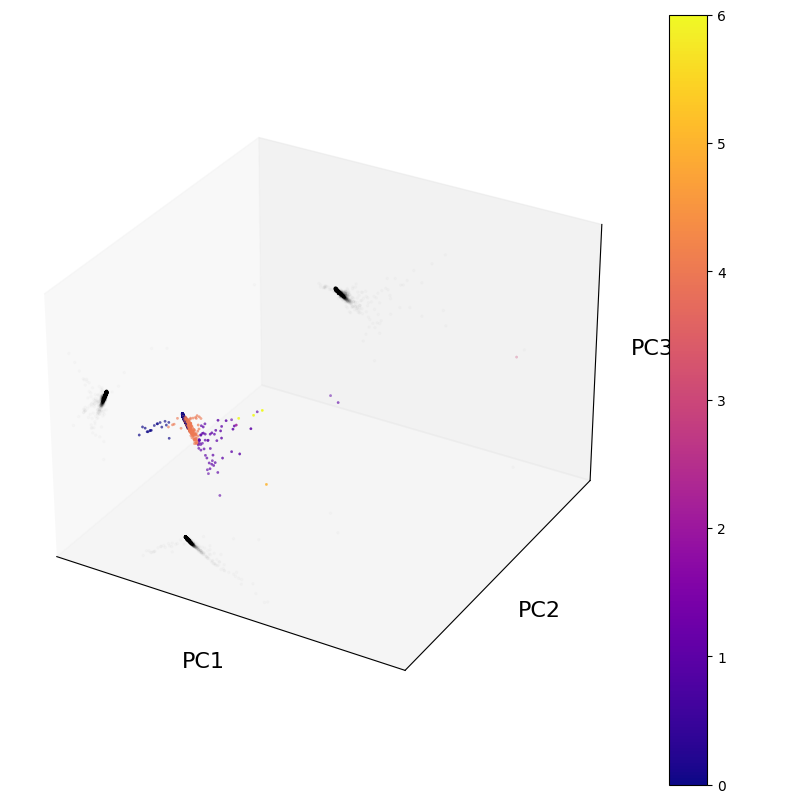

In [263]:
clusters = 7
X = pnp_dps
# X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
for col in X:
    X[col].fillna(value=X[col].median(), inplace=True)
# X
scaler = StandardScaler().fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

model = pca()
X_pca_array = model.fit_transform(X_scaled)
# X_pca_array = model.fit_transform(X)

print(X_pca_array['topfeat'][:10])

# X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

X = X_pca_array['PC'].values

spending_gmm = GaussianMixture(n_components=clusters)
y_cluster_gmm = spending_gmm.fit_predict(X)

color = y_cluster_gmm

plot3D(X[:,0], X[:,1], X[:,2], color, shadow=True, xLabel = 'PC1', yLabel = 'PC2', zLabel = 'PC3')

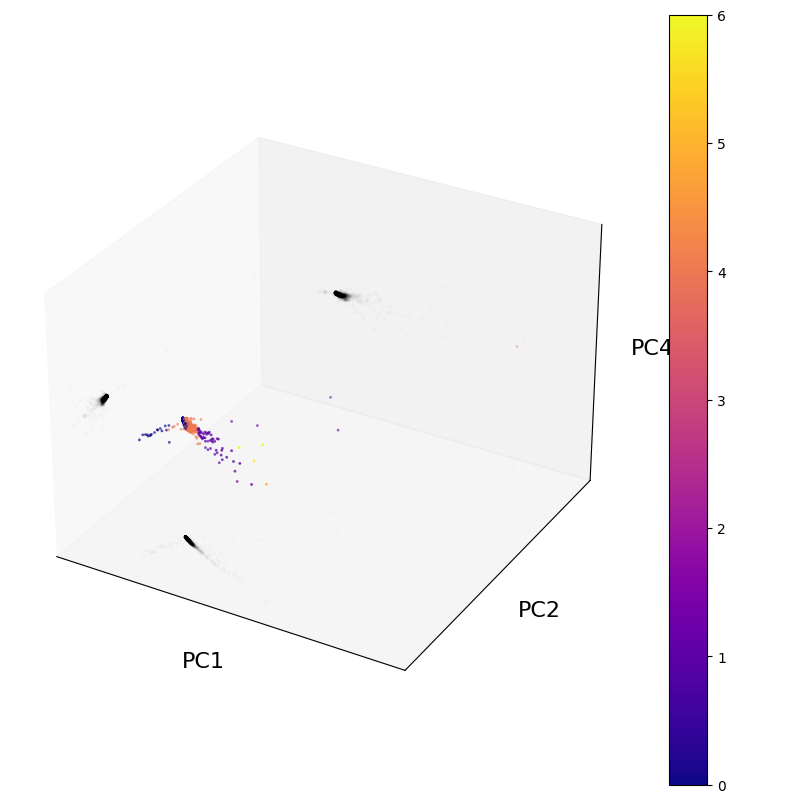

In [267]:
plot3D(X[:,0], X[:,1], X[:,8], color, shadow=True, xLabel = 'PC1', yLabel = 'PC2', zLabel = 'PC4')

In [283]:
fed_assist.iloc[:, 1:]

,uagrntt,uagrnta,upgrntt,upgrnta,ufloant,ufloana,agrnt_t,agrnt_a,npist0,npist1,npist2,pell/loans_total,pell/loans_average,avg_net_price_12-15
0,3.979543e+07,9421.285714,1.735037e+07,5033.142857,2.749449e+07,7581.714286,1.180797e+07,9441.571429,14393.571429,14748.714286,14488.000000,0.631049,0.663853,14393.571429
1,6.972894e+07,8304.857143,2.252380e+07,4994.428571,4.600713e+07,7243.714286,1.712199e+07,9477.714286,15758.714286,16220.571429,16650.285714,0.489572,0.689484,15758.714286
3,4.235716e+07,8837.714286,8.084301e+06,4334.714286,1.927970e+07,6789.857143,1.208038e+07,10943.714286,14246.571429,14786.857143,15362.857143,0.419317,0.638410,14246.571429
4,3.232794e+07,8284.571429,1.440571e+07,4549.428571,3.153627e+07,9402.000000,7.806731e+06,8731.285714,12016.714286,12398.857143,12680.285714,0.456798,0.483879,12016.714286
5,2.713054e+08,13944.428571,2.604532e+07,4445.000000,8.111538e+07,6584.857143,7.306926e+07,15447.142857,19815.857143,19925.857143,20258.428571,0.321090,0.675034,19815.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,3.866024e+06,2615.833333,2.446596e+06,4197.500000,5.777497e+05,4636.000000,7.073850e+05,2674.833333,9186.500000,8711.800000,8367.166667,4.234698,0.905414,9186.500000
7128,1.027138e+07,2215.833333,5.214895e+06,3971.600000,1.042622e+05,3357.000000,2.183325e+06,4020.666667,5195.500000,4930.800000,5208.333333,50.017136,1.183080,5195.500000
7166,1.524260e+05,5971.200000,9.860260e+04,4198.200000,2.149924e+05,6952.800000,1.784025e+04,3983.750000,18077.000000,32690.000000,33594.500000,0.458633,0.603814,18077.000000
7208,2.925284e+07,5712.600000,1.233972e+07,4003.000000,2.200478e+07,6483.200000,5.275704e+06,7358.400000,10133.600000,10046.000000,9676.000000,0.560775,0.617442,10133.600000


In [303]:
X = sm.add_constant(fed_assist[['uagrntt', 'pell/loans_average', 'pell/loans_total']])
y = fed_assist['avg_net_price_12-15']

mod = sm.OLS(y, X).fit()
print(mod.summary())


                             OLS Regression Results                            
Dep. Variable:     avg_net_price_12-15   R-squared:                       0.242
Model:                             OLS   Adj. R-squared:                  0.240
Method:                  Least Squares   F-statistic:                     171.2
Date:                 Fri, 02 Dec 2022   Prob (F-statistic):           2.28e-96
Time:                         15:13:39   Log-Likelihood:                -15608.
No. Observations:                 1617   AIC:                         3.122e+04
Df Residuals:                     1613   BIC:                         3.125e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.648e

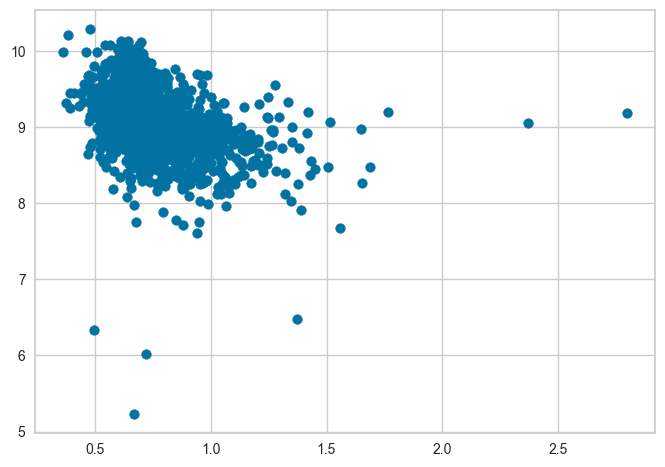

In [279]:
plt.scatter(fed_assist['pell/loans_average'], np.log(y))

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
['uagrntt', 'pell/loans_average', 'upgrnta', 'pell/loans_total', 'upgrnta', 'upgrntt']


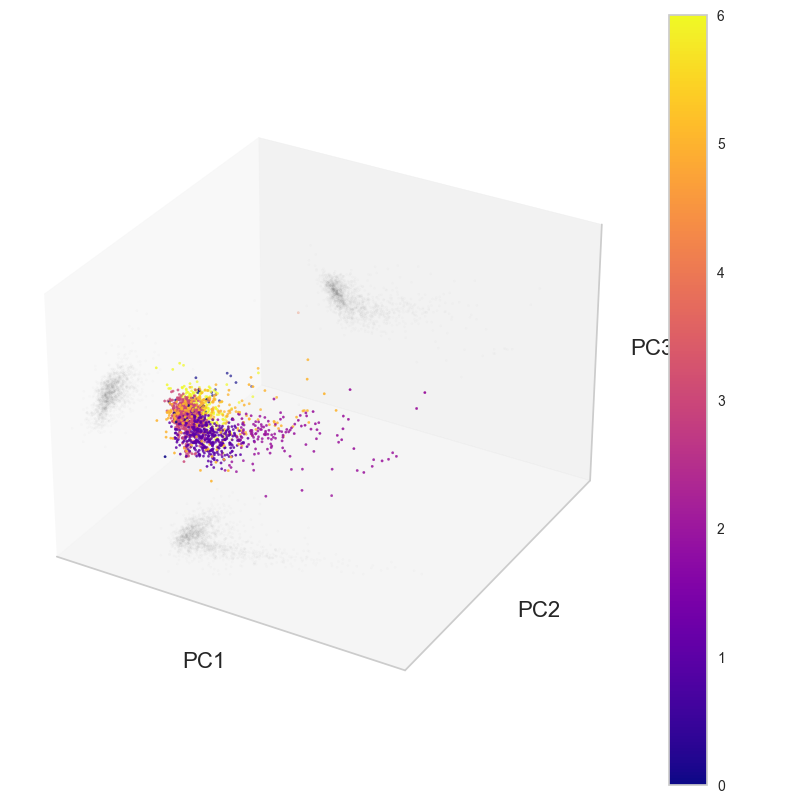

In [300]:
clusters = 7
X = fed_assist[['uagrntt', 'uagrnta', 'upgrntt', 'upgrnta', 'ufloant', 'ufloana', 'agrnt_t', 'agrnt_a', 'pell/loans_total', 'pell/loans_average']]
scaler = StandardScaler().fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

model = pca()
X_pca_array = model.fit_transform(X_scaled)

print(list(X_pca_array['topfeat']['feature'][:6]))

X = X_pca_array['PC'].values

spending_gmm = GaussianMixture(n_components=clusters)
y_cluster_gmm = spending_gmm.fit_predict(X)

color = y_cluster_gmm

plot3D(X[:,0], X[:,1], X[:,2], color, shadow=True, xLabel = 'PC1', yLabel = 'PC2', zLabel = 'PC3')


In [306]:
pnp_fin

,unitid,f2a01,f2a02,f2a03,f2a03a,f2a04,f2a05,f2a05a,f2a05b,f2a06,...,f2h03b,f2h03c,f2h03d,f2i01,f2i02,f2i03,f2i04,f2i05,f2i06,year
0,100690,8.760923e+06,1.307510e+07,2.535914e+06,1.508292e+06,9.889659e+06,6.495275e+05,1.748072e+05,4.747203e+05,1.053919e+07,...,13.0,0.0,0.0,2394351.0,9.381760e+06,2201197.0,1.195118e+07,1.415237e+07,0.000000e+00,1667.5
1,100937,5.235002e+07,1.722822e+08,5.624674e+07,3.738436e+07,5.059348e+07,6.544197e+07,4.314847e+07,2.229350e+07,1.160355e+08,...,1006739.0,5444864.0,-10889728.0,-6024836.0,3.979916e+07,-7539920.0,1.115290e+08,-4.126246e+06,3.179088e+07,1667.5
2,101073,1.404627e+06,1.362275e+07,4.539956e+06,0.000000e+00,6.643169e+06,2.439628e+06,1.393872e+06,1.045756e+06,9.082797e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1516.0
3,101189,2.053785e+07,9.023248e+07,4.341386e+07,3.305182e+07,2.887515e+07,1.794347e+07,1.271332e+07,5.230149e+06,4.681862e+07,...,333357.0,-1126002.0,0.0,-957785.0,4.266720e+07,-1371279.0,4.791496e+07,1.157321e+07,3.276091e+07,1667.5
4,101365,0.000000e+00,8.337251e+06,3.799330e+06,0.000000e+00,4.537922e+06,0.000000e+00,0.000000e+00,0.000000e+00,4.537922e+06,...,NaN,NaN,NaN,3106728.0,8.852352e+06,3106728.0,5.717594e+06,0.000000e+00,0.000000e+00,1768.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,495280,7.725700e+04,2.024860e+06,1.228340e+05,9.407800e+04,1.699223e+06,2.028030e+05,0.000000e+00,2.028030e+05,1.902026e+06,...,NaN,NaN,NaN,129147.0,1.130680e+06,228793.0,1.673233e+06,1.902026e+06,9.407800e+04,1920.0
2064,495314,0.000000e+00,2.988150e+06,1.590117e+07,0.000000e+00,-1.291302e+07,0.000000e+00,0.000000e+00,0.000000e+00,-1.291302e+07,...,2211182.0,0.0,0.0,-18765672.0,1.166282e+07,-18765672.0,5.904168e+06,0.000000e+00,0.000000e+00,1920.0
2065,495767,6.570770e+09,1.713559e+10,7.703068e+09,2.337306e+09,6.629454e+09,2.803071e+09,1.932855e+09,8.702160e+08,9.432525e+09,...,207489000.0,-126397000.0,40530000.0,-924020000.0,6.631981e+09,-733478000.0,1.016600e+10,5.833461e+09,2.337306e+09,1920.0
2066,495916,0.000000e+00,2.890460e+05,1.864020e+05,0.000000e+00,1.026440e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.026440e+05,...,NaN,NaN,NaN,1437517.0,2.266049e+06,1437517.0,-1.334873e+06,2.890460e+05,0.000000e+00,1920.0


In [317]:
accept_rate = pd.read_csv("datasets/Admission and Test Scores/ADM_2015-2021_data.csv")
public_pnp_finances = pd.read_csv("datasets/Institutional Finances/F_F2_1415-1920_data.csv", low_memory=False)
public_pnp_finances = public_pnp_finances.groupby('unitid').mean().reset_index()

accept_rate['acceptance_rate'] = accept_rate['admssn']/accept_rate['applcn']
accept_rate = accept_rate[['unitid', 'acceptance_rate', 'year']].groupby('unitid').mean().reset_index()
accept_rate = pd.merge(accept_rate, public_pnp_finances, on='unitid', how='inner').dropna()
accept_rate = accept_rate.drop(['year_x', 'year_y'], axis=1)
# X = accept_rate
# scaler = StandardScaler().fit(X)
# X_scaled_array = scaler.transform(X)
# X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

# model = pca()
# X_pca_array = model.fit_transform(X_scaled)

# print(X_pca_array['topfeat']['feature'])
accept_rate

,unitid,acceptance_rate,f2a01,f2a02,f2a03,f2a03a,f2a04,f2a05,f2a05a,f2a05b,...,f2h03a,f2h03b,f2h03c,f2h03d,f2i01,f2i02,f2i03,f2i04,f2i05,f2i06
0,100937,0.571613,5.235002e+07,1.722822e+08,5.624674e+07,3.738436e+07,5.059348e+07,6.544197e+07,4.314847e+07,2.229350e+07,...,723856.0,1006739.0,5444864.0,-10889728.0,-6024836.0,39799160.0,-7539920.0,111529044.0,-4126246.0,31790881.0
2,101189,0.606638,2.053785e+07,9.023248e+07,4.341386e+07,3.305182e+07,2.887515e+07,1.794347e+07,1.271332e+07,5.230149e+06,...,139049.0,333357.0,-1126002.0,0.0,-957785.0,42667202.0,-1371279.0,47914957.0,11573210.0,32760907.0
4,101435,0.588329,4.908868e+07,8.632108e+07,2.745403e+07,2.322056e+07,8.055055e+06,5.081199e+07,4.809520e+07,2.716798e+06,...,412088.0,16509172.0,950000.0,-16778603.0,-686230.0,22779048.0,343197.0,59936528.0,4203671.0,23298140.0
5,101453,0.587059,1.246866e+07,1.619727e+07,2.353533e+06,8.131733e+05,3.697835e+06,1.014590e+07,6.611702e+06,3.534199e+06,...,578140.0,475730.0,376928.0,-753856.0,174578.0,3065989.0,867843.0,16297455.0,4587346.0,0.0
6,101541,0.521834,1.583669e+07,3.217821e+07,1.653310e+07,9.644123e+06,7.843672e+05,1.486074e+07,1.324387e+07,1.616869e+06,...,0.0,386384.0,-1818650.0,0.0,-1944891.0,6919126.0,257663.0,13969592.0,1353762.0,11907574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,475608,0.981767,1.876266e+07,3.012457e+07,1.391718e+06,7.868713e+05,1.214122e+07,1.659163e+07,1.443227e+07,2.159366e+06,...,1000.0,246759.0,-397448.0,-1017347.0,-1055853.0,733030.0,733030.0,30829091.0,12962094.0,2945978.0
1278,481225,1.000000,1.366102e+05,2.495911e+06,1.716177e+05,1.088988e+05,2.092101e+06,2.321923e+05,1.339008e+05,9.829150e+04,...,0.0,0.0,0.0,-56820.0,88881.0,1553958.0,88881.0,2456012.0,261652.0,55453.0
1283,483018,0.803666,3.865592e+07,9.636871e+07,3.516414e+07,6.675000e+06,1.533097e+07,4.587360e+07,1.947927e+07,2.639433e+07,...,341290.0,744138.0,0.0,-26379216.0,24569918.0,38705480.0,-3238705.0,56050997.0,7607368.0,7575000.0
1296,486901,0.767089,4.044887e+07,1.052763e+08,1.859202e+07,1.334907e+07,3.341333e+07,5.327090e+07,3.336122e+07,1.990968e+07,...,1057254.0,1963244.0,-568959.0,0.0,-459163.0,27825147.0,2455874.0,89668611.0,25416526.0,12333850.0


In [322]:
charges = pd.read_csv("datasets/Institutional Characteristics/IC_AY_2015-2021_data.csv")
charges = charges.groupby('unitid').mean().reset_index()
charges

,unitid,year
0,100654,2018.0
1,100663,2018.0
2,100690,2018.0
3,100706,2018.0
4,100724,2018.0
...,...,...
4843,497116,2021.0
4844,497125,2021.0
4845,497213,2021.0
4846,497268,2021.0


In [372]:
accept_rate = pd.read_csv("datasets/Admission and Test Scores/ADM_2015-2021_data.csv")
accept_rate = accept_rate.groupby('unitid').mean().reset_index()
public_pnp_finances = pd.read_csv("datasets/Institutional Finances/F_F2_1415-1920_data.csv", low_memory=False)
public_pnp_finances = public_pnp_finances.groupby('unitid').mean().reset_index()
enrollment = pd.read_csv("datasets/Fall Enrollment/EFD_2015-2020_data.csv")
enrollment = enrollment.groupby('unitid').mean().reset_index()
yield_df = pd.merge(accept_rate, enrollment, on='unitid', how='inner')
yield_df = pd.merge(yield_df, public_pnp_finances, on='unitid', how='inner')
yield_df = yield_df.drop(['year_x', 'year_y', 'year'], axis=1)
yield_df['yield'] = yield_df['enrlt']/yield_df['admssn']
yield_df['log_yield_per_dollar'] = np.log(1000000000*yield_df['yield']/yield_df['f2a02'])
yield_df.replace([np.inf, -np.inf], np.nan, inplace=True)
yield_df = yield_df.fillna(yield_df.median())
X = yield_df[list(public_pnp_finances)[1:-1]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
model = pca()
X_pca_array = model.fit_transform(X_scaled)
best_feats = list(set(X_pca_array['topfeat'][X_pca_array['topfeat']['type'] == 'best']['feature']))
print(best_feats)
all_cols = ['unitid', 'log_yield_per_dollar'] + best_feats + ['f2b02']
yield_efficiency = yield_df[all_cols]
yield_efficiency = yield_efficiency.rename(columns=
                                {'f2b02':'Total expenses',
                                 'f2e094':'Hospital services-Operation and maintenance of plant',
                                 'f2d084b':'Private grants, and contracts - Permanently restricted',
                                 'f2d143':'Independent operations revenue - Temporarily restricted',
                                 'f2d042':'Local appropriations - Unrestricted',
                                 'f2a19':'Property, Plant, and Equipment, net of accumulated depreciation',
                                 'f2e101':'Independent operations-Total Amount',
                                 'f2d144':'Independent operations revenue - Permanently restricted',
                                 'f2h03d':'Other changes in value of endowment net assets',
                                 'f2e126':'Other expenses-Interest',
                                 'f2c152':'Discounts and allowances from local government grants applied to auxiliary enterprises',
                                 'f2e105':'Independent operations-Depreciation',
                                 'f2d054':'Federal grants and contracts - Pemanently restricted',
                                 'f2d174':'Net assets released from restriction - Permanently restricted',
                                 'f2d074':'Local grants and contracts - Permanently restricted',
                                 'f2c141':'Discounts and allowances from state government grants applied to tuition and fees',
                                 'f2d04':'Local appropriations - Total',
                                 'f2d023':'Federal appropriations - Temporarily restricted',
                                 'f2h03a':'New gifts and additions',
                                 'f2e091':'Hospital services-Total amount',
                                 'f2d153':'Other revenue - Temporarily restricted',
                                 'f2a20':'Intangible Assets, net of accumulated amortization',
                                 'f2e107':'Independent operations-All other',
                                 'f2c142':'Discounts and allowances from state government grants applied to auxiliary enterprises',
                                 'f2d033':'State appropriations - Temporarily restricted',
                                 'f2a05b':'Temporarily restricted net assets',
                                 'f2c162':'Discounts and allowances from endowments and gifts applied to auxiliary enterprises',
                                 'f2b06':'Adjustments to beginning of year net assets',
                                 'f2d053':'Federal grants and contracts - Temporarily restricted',
                                 'f2d154':'Other revenue - Permanently restricted',
                                 'f2c09':'Allowances applied to auxiliary enterprise revenues',
                                 'f2c132':'Discounts and allowances from other federal grants applied to auxiliary enterprises',
                                 'f2e042':'Academic support-Salaries and wages',
                                 'f2c151':'Discounts and allowances from local government grants applied to tuition and fees',
                                 'f2d07':'Local grants and contracts - Total',
                                 'f2d014':'Tuition and fees - Permanently restricted'})
negs = []
for col in yield_efficiency:
    if col not in {'unitid','log_yield_per_dollar', 'Total expenses'}:
        if yield_efficiency[col].min() < 0:
            print(col)
            negs.append(col)
        else:
            yield_efficiency[col + '_per_dollar'] = yield_efficiency[col]/yield_efficiency['Total expenses']
yield_efficiency = yield_efficiency.drop(negs, axis=1)
cols = list(yield_efficiency)[:2] + list(yield_efficiency)[31:]
autofeature_per_dollar_expense = yield_efficiency[cols]
autofeature_per_dollar_expense

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [226] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [43] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [226] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[43]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
['f2c152', 'f2d084b', 'f2b06', 'f2e107', 'f2c142', 'f2e101', 'f2d074', 'f2d143', 'f2e042', 'f2e091', 'f2d04', 'f2d033', 'f2c151', 'f2a19', 'f2d07', 'f2a20', 'f2a05b', 'f2d153', 'f2c09', 'f2d054', 'f2e094', 'f2d174', 'f2d014', 'f2d053', 'f2h03d', 'f2h03a', 'f2d042', 'f2c162', 'f2e105', 'f2d154', 'f2d144', 'f2c141', 'f2c132', 'f2e126', 'f2d023']
Private grants, and contracts - Permanently restric

,unitid,log_yield_per_dollar,Total expenses,Discounts and allowances from local government grants applied to auxiliary enterprises_per_dollar,Independent operations-All other_per_dollar,Discounts and allowances from state government grants applied to auxiliary enterprises_per_dollar,Independent operations-Total Amount_per_dollar,Local grants and contracts - Permanently restricted_per_dollar,Independent operations revenue - Temporarily restricted_per_dollar,Academic support-Salaries and wages_per_dollar,...,Federal grants and contracts - Temporarily restricted_per_dollar,New gifts and additions_per_dollar,Local appropriations - Unrestricted_per_dollar,Discounts and allowances from endowments and gifts applied to auxiliary enterprises_per_dollar,Independent operations-Depreciation_per_dollar,Independent operations revenue - Permanently restricted_per_dollar,Discounts and allowances from state government grants applied to tuition and fees_per_dollar,Discounts and allowances from other federal grants applied to auxiliary enterprises_per_dollar,Other expenses-Interest_per_dollar,Federal appropriations - Temporarily restricted_per_dollar
0,100937,0.070208,4.639203e+07,0.0,0.0,0.000000,0.000000,0.0,0.0,0.015185,...,0.000000,0.015603,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,101073,2.926926,1.092255e+07,0.0,0.0,0.000000,0.000000,0.0,0.0,0.017438,...,0.093218,0.085327,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,101189,1.028931,4.390331e+07,0.0,0.0,0.000174,0.000000,0.0,0.0,0.029690,...,0.031491,0.003167,0.0,0.000597,0.0,0.0,0.002328,0.000423,0.0,0.0
3,101365,4.387081,5.469524e+06,0.0,0.0,0.000000,0.000000,0.0,0.0,0.036237,...,0.000000,0.170397,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,101435,0.886378,2.221401e+07,0.0,0.0,0.000000,0.000000,0.0,0.0,0.043952,...,0.000000,0.018551,0.0,0.000000,0.0,0.0,0.018826,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,494463,0.758840,3.784147e+07,0.0,0.0,0.000000,0.000000,0.0,0.0,0.002314,...,0.000000,0.024629,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1334,494685,6.681552,2.480739e+06,0.0,0.0,0.000000,0.000000,0.0,0.0,0.063212,...,0.000000,0.375692,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1335,495031,5.031184,1.668280e+06,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.558655,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1336,495767,-4.484722,7.653947e+09,0.0,0.0,0.000000,0.002397,0.0,0.0,0.032710,...,0.000000,0.011193,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [373]:
x = autofeature_per_dollar_expense.iloc[:, 2:]
y = autofeature_per_dollar_expense['log_yield_per_dollar']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=5)
grid = {
    'n_estimators': [5, 10, 15],
    'max_depth' : [5, 7, 10, 13, 15],
    'eta' : [0.01, 0.05, 0.1, 0.15],
    'grow_policy' : ['depthwise', 'lossguide']
}

model = XGBRegressor()
xgbr_cv = RandomizedSearchCV(estimator=model, param_distributions=grid, cv=5, n_jobs=-1)
xgbr_cv.fit(x_train, y_train)
res = xgbr_cv.best_params_
print(res)
xgbr = XGBRegressor(n_estimators=res["n_estimators"], max_depth=res["max_depth"], eta=res["eta"], grow_policy=res["grow_policy"], eval_metric='rmse').fit(x_train, y_train)
score = xgbr.score(x_test, y_test)
preds = xgbr.predict(x_test)
mse = mean_squared_error(y_test, preds)
print("R^2 Score: ", score)
print("MSE: ", mse)
print("RMSE: ", mse**(0.5))

/Users/michael/opt/anaconda3/envs/stonks/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michael/opt/anaconda3/envs/stonks/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michael/opt/anaconda3/envs/stonks/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/michael/opt/anaconda3/envs/stonks/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecate

{'n_estimators': 15, 'max_depth': 5, 'grow_policy': 'depthwise', 'eta': 0.1}
R^2 Score:  0.8619085862816571
MSE:  0.9578461875805822
RMSE:  0.9786961671430936


In [366]:
xgbr.get_booster().get_score(importance_type='weight')

{'Total expenses': 738.0,
 'Discounts and allowances from local government grants applied to auxiliary enterprises_per_dollar': 2.0,
 'Independent operations-All other_per_dollar': 30.0,
 'Discounts and allowances from state government grants applied to auxiliary enterprises_per_dollar': 2.0,
 'Independent operations-Total Amount_per_dollar': 17.0,
 'Local grants and contracts - Permanently restricted_per_dollar': 3.0,
 'Independent operations revenue - Temporarily restricted_per_dollar': 34.0,
 'Academic support-Salaries and wages_per_dollar': 367.0,
 'State appropriations - Temporarily restricted_per_dollar': 4.0,
 'Discounts and allowances from local government grants applied to tuition and fees_per_dollar': 21.0,
 'Property, Plant, and Equipment, net of accumulated depreciation_per_dollar': 418.0,
 'Local grants and contracts - Total_per_dollar': 56.0,
 'Intangible Assets, net of accumulated amortization_per_dollar': 54.0,
 'Temporarily restricted net assets_per_dollar': 351.0,
 'A

In [367]:
manual_per_dollar_expense = yield_df[['unitid', 'log_yield_per_dollar', 'f2b02', 'f2c05', 'f2c06', 'f2d11', 'f2d12', 'f2e011', 'f2e021', 'f2e031', 'f2e041', 'f2e051', 'f2e061', 'f2e071', 'f2e081']]
manual_per_dollar_expense

,unitid,log_yield_per_dollar,f2b02,f2c05,f2c06,f2d11,f2d12,f2e011,f2e021,f2e031,f2e041,f2e051,f2e061,f2e071,f2e081
0,100937,0.070208,4.639203e+07,5.578125e+06,1.619607e+07,0.0,1.520883e+07,1.432264e+07,0.0,0.0,3.283277e+06,9.475854e+06,9.170287e+06,9.820546e+06,319422.333333
1,101073,2.926926,1.092255e+07,0.000000e+00,7.310033e+05,0.0,1.950601e+06,3.382461e+06,0.0,0.0,4.764743e+05,9.262417e+05,3.278771e+06,2.858568e+06,0.000000
2,101189,1.028931,4.390331e+07,5.326997e+05,1.192251e+07,0.0,3.216318e+06,1.745256e+07,0.0,0.0,3.079230e+06,9.203930e+06,8.663598e+06,4.439644e+06,0.000000
3,101365,4.387081,5.469524e+06,0.000000e+00,1.017367e+06,0.0,0.000000e+00,2.209669e+06,0.0,0.0,3.064165e+05,1.634070e+06,9.270015e+05,0.000000e+00,0.000000
4,101435,0.886378,2.221401e+07,3.990944e+06,6.483747e+06,0.0,4.608309e+06,6.681050e+06,0.0,0.0,1.637742e+06,6.598691e+06,3.879128e+06,3.417398e+06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,494463,0.758840,3.784147e+07,0.000000e+00,5.695100e+05,0.0,5.448486e+06,6.537635e+05,0.0,0.0,2.461665e+05,1.727585e+05,2.818965e+05,4.616294e+06,0.000000
1334,494685,6.681552,2.480739e+06,2.489000e+04,1.626265e+05,0.0,0.000000e+00,7.116285e+05,0.0,0.0,2.914880e+05,7.338835e+05,6.517215e+05,0.000000e+00,0.000000
1335,495031,5.031184,1.668280e+06,0.000000e+00,1.061202e+06,0.0,0.000000e+00,5.237670e+05,0.0,42663.0,0.000000e+00,1.466910e+05,1.580580e+05,0.000000e+00,797101.000000
1336,495767,-4.484722,7.653947e+09,8.661300e+07,1.397470e+08,111328000.0,3.971200e+08,1.370535e+09,944235000.0,111261000.0,3.827030e+08,1.995680e+08,3.921340e+08,4.160090e+08,0.000000


In [368]:
manual_per_dollar_expense = manual_per_dollar_expense.rename(columns=
                                                            {
                                                                'f2b02':'Total expenses',
                                                                'f2c05':'Institutional grants (funded)',
                                                                'f2c06':'Institutional grants (unfunded)',
                                                                'f2d11':'Sales and services of educational activities - Total',
                                                                'f2d12':'Sales and services of auxiliary enterprises - Total',
                                                                'f2e011':'Instruction-Total amount',
                                                                'f2e021':'Research-Total amount',
                                                                'f2e031':'Public service-Total amount',
                                                                'f2e041':'Academic support-Total amount',
                                                                'f2e051':'Student service-Total amount',
                                                                'f2e061':'Institutional support-Total amount',
                                                                'f2e071':'Auxiliary enterprises-Total amount',
                                                                'f2e081':'Net grant aid to students-Total amount'
                                                            })
m_negs = []
for i in manual_per_dollar_expense:
    if i not in {'unitid', 'log_yield_per_dollar', 'Total expenses'}:
        if manual_per_dollar_expense[i].min() < 0:
            print(i)
            m_negs.append(i)
        else:
            manual_per_dollar_expense[i + "_per_dollar"] = manual_per_dollar_expense[i]/manual_per_dollar_expense['Total expenses']
            m_negs.append(i)
manual_per_dollar_expense = manual_per_dollar_expense.drop(m_negs, axis=1)
manual_per_dollar_expense

,unitid,log_yield_per_dollar,Total expenses,Institutional grants (funded)_per_dollar,Institutional grants (unfunded)_per_dollar,Sales and services of educational activities - Total_per_dollar,Sales and services of auxiliary enterprises - Total_per_dollar,Instruction-Total amount_per_dollar,Research-Total amount_per_dollar,Public service-Total amount_per_dollar,Academic support-Total amount_per_dollar,Student service-Total amount_per_dollar,Institutional support-Total amount_per_dollar,Auxiliary enterprises-Total amount_per_dollar,Net grant aid to students-Total amount_per_dollar
0,100937,0.070208,4.639203e+07,0.120239,0.349113,0.000000,0.327833,0.308731,0.000000,0.000000,0.070772,0.204256,0.197669,0.211686,0.006885
1,101073,2.926926,1.092255e+07,0.000000,0.066926,0.000000,0.178585,0.309677,0.000000,0.000000,0.043623,0.084801,0.300184,0.261713,0.000000
2,101189,1.028931,4.390331e+07,0.012133,0.271563,0.000000,0.073259,0.397523,0.000000,0.000000,0.070137,0.209641,0.197334,0.101123,0.000000
3,101365,4.387081,5.469524e+06,0.000000,0.186007,0.000000,0.000000,0.403997,0.000000,0.000000,0.056023,0.298759,0.169485,0.000000,0.000000
4,101435,0.886378,2.221401e+07,0.179659,0.291876,0.000000,0.207451,0.300758,0.000000,0.000000,0.073726,0.297051,0.174625,0.153840,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,494463,0.758840,3.784147e+07,0.000000,0.015050,0.000000,0.143982,0.017276,0.000000,0.000000,0.006505,0.004565,0.007449,0.121990,0.000000
1334,494685,6.681552,2.480739e+06,0.010033,0.065556,0.000000,0.000000,0.286861,0.000000,0.000000,0.117500,0.295833,0.262713,0.000000,0.000000
1335,495031,5.031184,1.668280e+06,0.000000,0.636105,0.000000,0.000000,0.313956,0.000000,0.025573,0.000000,0.087929,0.094743,0.000000,0.477798
1336,495767,-4.484722,7.653947e+09,0.011316,0.018258,0.014545,0.051884,0.179063,0.123366,0.014536,0.050001,0.026074,0.051233,0.054352,0.000000


In [369]:
x = manual_per_dollar_expense.iloc[:, 2:]
y = manual_per_dollar_expense['log_yield_per_dollar']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=5)
grid = {
    'n_estimators': [5, 10, 15],
    'max_depth' : [5, 7, 10, 13, 15],
    'eta' : [0.01, 0.05, 0.1, 0.15],
    'grow_policy' : ['depthwise', 'lossguide']
}

model = XGBRegressor()
xgbr_cv = RandomizedSearchCV(estimator=model, param_distributions=grid, cv=5, n_jobs=-1)
xgbr_cv.fit(x_train, y_train)
res = xgbr_cv.best_params_
print(res)
xgbr = XGBRegressor(n_estimators=res["n_estimators"], max_depth=res["max_depth"], eta=res["eta"], grow_policy=res["grow_policy"], eval_metric='rmse').fit(x_train, y_train)
score = xgbr.score(x_test, y_test)
preds = xgbr.predict(x_test)
mse = mean_squared_error(y_test, preds)
print("Test set R^2 Score: ", score)
print("MSE: ", mse)
print("RMSE: ", mse**(0.5))

/Users/michael/opt/anaconda3/envs/stonks/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/michael/opt/anaconda3/envs/stonks/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/michael/opt/anaconda3/envs/stonks/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/michael/opt/anaconda3/envs/stonks/lib/python3.9/site-packages/xgboost

{'n_estimators': 15, 'max_depth': 5, 'grow_policy': 'lossguide', 'eta': 0.15}
Test set R^2 Score:  0.8750007094230059
MSE:  0.8670350364698115
RMSE:  0.9311471615538607


In [371]:
xgbr.get_booster().get_score(importance_type='weight')

{'Total expenses': 144.0,
 'Institutional grants (funded)_per_dollar': 50.0,
 'Institutional grants (unfunded)_per_dollar': 29.0,
 'Sales and services of educational activities - Total_per_dollar': 22.0,
 'Sales and services of auxiliary enterprises - Total_per_dollar': 41.0,
 'Instruction-Total amount_per_dollar': 31.0,
 'Research-Total amount_per_dollar': 16.0,
 'Public service-Total amount_per_dollar': 6.0,
 'Academic support-Total amount_per_dollar': 20.0,
 'Student service-Total amount_per_dollar': 21.0,
 'Institutional support-Total amount_per_dollar': 22.0,
 'Auxiliary enterprises-Total amount_per_dollar': 22.0,
 'Net grant aid to students-Total amount_per_dollar': 3.0}